<a href="https://colab.research.google.com/github/Bhavani-456/cicd_pipeline/blob/main/gibli_%26_stable_diffusion_image_based_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIBLI STYLE IMAGE USING GIBLI DIFFUSION MODEL BY STABLE DIFFUSION


In [5]:
!nvidia-smi

Tue Jul 29 03:04:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidi

In [1]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "nitrosocke/Ghibli-Diffusion"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "ghibli style magical princess with golden hair"
image = pipe(prompt).images[0]

image.save("./magical_princess.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

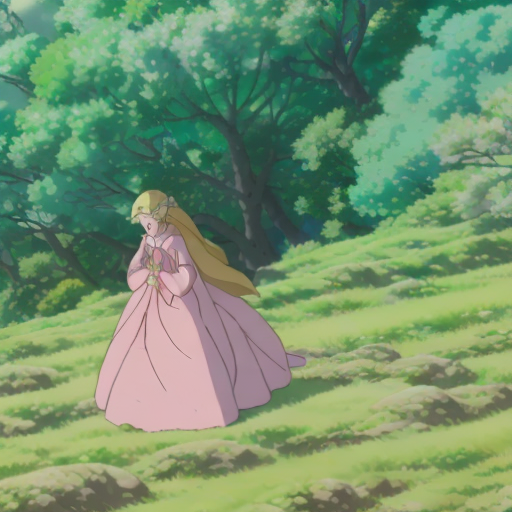

In [2]:
from IPython.display import Image
Image("./magical_princess.png")


In [3]:
!pip install gradio

In [4]:
from diffusers import StableDiffusionImg2ImgPipeline, LMSDiscreteScheduler
#The LMSDiscreteScheduler helps manage the "timing" and "steps"during image generation to make sure the process is efficient and produces a high-quality result.
import torch
from PIL import Image
import gradio as gr
import numpy as np

In [7]:
import random

In [9]:
from diffusers import StableDiffusionImg2ImgPipeline, LMSDiscreteScheduler
import torch

def predict(scheduler, prompt, image, strength=0.75, guidance_scale=7.5):
    # Load the model only once and use float16 to save VRAM
    pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
        "nitrosocke/Ghibli-Diffusion",
        torch_dtype=torch.float16
    ).to("cuda")

    pipe.enable_attention_slicing()  # Optional: reduces memory usage

    # Apply the LMS scheduler if specified
    if scheduler == "LMS":
        pipe.scheduler = LMSDiscreteScheduler.from_config(pipe.scheduler.config)

    # Run inference
    result = pipe(
        prompt=prompt,
        image=image.convert("RGB"),
        strength=strength,
        guidance_scale=guidance_scale
    ).images[0]

    return result


In [ ]:
import gradio as gr

# Define the predict function
def predict(image):
    # Add the image processing logic here
    # For now, just return the input image as the output (for demonstration)
    return image

# Create the Gradio interface
gr.Interface(
    predict,  # The function to call when the interface is used
    inputs=gr.Image(type="pil"),  # Input: just an image
    outputs=gr.Image(),  # Output: generated image
    title="Simple Image-to-Image Generation",
).launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4e539919e0809b5fcf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
